# ***Tutorial-3:  Computational identification of TATA box and Transription Start Site***

# Biopython package installation:

In [3]:
# pip install biopython

Note: you may need to restart the kernel to use updated packages.


# Importing essential modules from Biopython:

In [4]:
from Bio import Entrez, Seq, SeqIO
from Bio.SeqUtils import nt_search

# Defining a function to fetch DNA sequence from NCBI:

In [5]:
def fetch_dna_sequence(accession_number):
    # Provide your own email address to comply with NCBI requirements
    Entrez.email = "prasanna23234@iiitd.ac.in"

    # Fetch the sequence using the accession number
    handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()

    # Extract the DNA sequence from the fetched record
    dna_sequence = str(record.seq)
    return dna_sequence


# Defining a function to find TATA box and Transcription Start Site(TSS):


**Note:**

1. This is a simple example, and you may need to adapt the code based on the specific characteristics of your DNA sequences and the organisms you are working with.

2. Additionally, in real-world scenarios, it's essential to consider the variability of TATA box sequences and the presence of other regulatory elements.

3. This function is designed to identify the TATA box and calculate the Transcription Start Site (TSS) position based on the first TATA box variant found in the DNA sequence.

> A sample gene structure is given below:

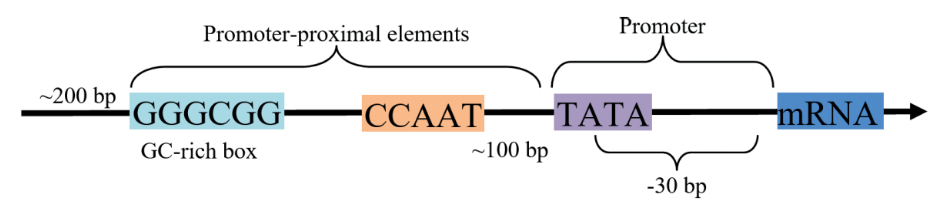

In [6]:
def find_tata_and_tss(dna_sequence):
    # Adapted code to consider variability in the TATA box sequence
    tata_box_variants = ["TATAAA", "TATAAT", "TATATA", "TATCAA"]  # Add more variants as needed
    # Loop through each TATA box variant
    for tata_box in tata_box_variants:
        print("len of tatabox =",len(tata_box))
        # Search for the current TATA box variant in the DNA sequence
        tata_matches = nt_search(dna_sequence, tata_box)

        # Check if any matches were found for the current TATA box variant
        if tata_matches:
            # Extract positions from the list (excluding the TATA box sequence itself)
            positions = [pos for pos in tata_matches if isinstance(pos, int)]

            # Print the TATA box and its positions
            print(f"TATA box ({tata_box}) found at positions: {positions}")

            # Check if positions were found
            if positions:
                # Calculate the Transcription Start Site (TSS) position
                tss_position = positions[0] + len(tata_box)
                print(f"Transcription Start Site (TSS) position: {tss_position}")

            # Exit the loop after finding the first TATA box variant
            break
    else:
        # Print a message if no TATA box variant was found in the given sequence
        print("No TATA box variant found in the given sequence.")


***Here's the step-by-step explanation:***


1. **Variability in TATA Box Sequence:**

  The function starts with a list of TATA box variants (`tata_box_variants`), allowing for flexibility in recognizing different TATA box sequences.

2. **Loop through TATA Box Variants:**

  It iterates through each TATA box variant in the list.

3. **Search for TATA Box:**

  For each TATA box variant, it uses the `nt_search` function to find matches in the DNA sequence.

4. **Extract Positions:**

  It extracts the positions where the TATA box variant was found. The `tata_matches` list contains both the TATA box sequence and its positions. The list comprehension (`positions = [pos for pos in tata_matches if isinstance(pos, int)]`) filters out the TATA box sequences and keeps only the positions.

5. **Print Results:**

  It prints the TATA box variant and its positions.

6. **Calculate TSS Position:**

  If positions were found, it calculates the Transcription Start Site (TSS) position by adding the first position to the length of the TATA box.

7. **Exit Loop:**

  It exits the loop after finding the first TATA box variant to avoid redundant processing.

8. **Print Message if No TATA Box Variant Found:**

  If none of the TATA box variants are found in the given sequence, it prints a message indicating that no TATA box variant was found.


# Example usage:

In [7]:
# Example usage with a specific accession number (replace with your own)
accession_number = "NG_012575.3"    # This accession ID corresponds to Human ACE2 sequence that was discussed in Tutorial-1

sequence = fetch_dna_sequence(accession_number)

In [8]:
sequence

'TGATTGAGGTAAACTTCATTTATGCTCTCACCACCCCCGCTTTTTTTTTGAGATGGAGTCTCGCTCTGCCACCCAGGCTGGAGTCCAGTGGCACTATCTTGGCTCACTGTAACCTCCACCTCCTGGGTACAAGCGATTCTTCTGCCTCAGCCTCCTGAGTAGCTGGAACTACGGGCGCACACCACCATGCCCGGCTAATTTTTGTATGTTTAGTAGAGACAGGGTTTCACCACATTGTCCAGGCTGGTCTCAAACTCCTGACCTCAGGTGATCCACCCTCCTCAGCCTCCCAAAGTGCTGGGATTACAGGCCTGAGCCACCGCGCCTGGGCCTTTCATTTTCTTCATCTATGAGAAGGTAGTAACAATACCATTTTTACAGGGTCATTTGGTGGATTCAGTGACAACATATGTAAGGCATTTAGCCCAATGCCTGACTTACAGTAATCATGCTGTTTTTCTCTCACGTCTTTTACCATAGTAACTTGAATCATAGCTTCCAAATCTCATTTTGTTCCAGAAAATTTTTCCACCTTTTTTTCAGTTGATACTAATCTCTATCCATCACATTCTGTGGATGGGCAAATAAACAGATGAAATATGCCATATGAAAATGAATTATGCTACACACAGGGTAGACAACTGAGCTTTCCCTCTTCTTCCTCCTTACTACTGAGTTGCTGAACAATGTCTGTATTCAATAAATATTTATTGTGTGTACCTATAATGCACCAGCCACTTTTCTAAGCAGCTGAAGATATAGCAGTGAACAAAATAGAGAAAAGTTTCTGCCCTCTTGGAGCTTATATTTTAGTGGGGAGAGACAGATAATAAAGGAATACATTAGTAAAACATGTAATTATGAGTACCGTGTAGCAGATGGTGGTGTCATGAAAAAAAATAAAGGATGGAAGTTGTATAAATAGTGCCACTATATGTGTATGTAGTGGTGATAGGGAGGATAAATTTTAATTAGTTGATTGGGTAGCTTGAGCTTTAC

In [9]:
len(sequence)

96015

In [10]:
find_tata_and_tss(sequence)

6
TATA box (TATAAA) found at positions: [916, 5441, 5452, 5723, 6406, 7019, 11728, 16214, 16917, 18001, 18204, 18976, 21711, 25023, 29049, 30025, 31776, 32381, 32707, 32767, 32880, 35464, 37756, 38507, 44330, 44878, 45597, 46737, 47449, 47916, 49653, 53661, 53973, 55256, 55730, 56202, 56497, 56685, 59102, 59893, 60067, 61468, 63184, 63371, 63582, 64508, 64705, 68611, 70764, 75179, 76343, 76580, 76605, 76659, 76868, 77623, 78167, 78285, 79536, 79834, 81308, 86950, 86968, 89311, 90474, 90923, 90959, 95314]
Transcription Start Site (TSS) position: 922
